<a href="https://colab.research.google.com/github/HarshShetye/Djs_Compute_Task/blob/main/ML_Task_6_XGBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you. 


ALL THE BEST!

Importing necessary libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn import metrics


colour = sns.color_palette()

Reading and converting data into a date-time format

In [92]:
df = pd.read_csv('AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [94]:
df.duplicated()

Datetime
2004-12-31 01:00:00    False
2004-12-31 02:00:00    False
2004-12-31 03:00:00    False
2004-12-31 04:00:00    False
2004-12-31 05:00:00    False
                       ...  
2018-01-01 20:00:00     True
2018-01-01 21:00:00     True
2018-01-01 22:00:00     True
2018-01-01 23:00:00     True
2018-01-02 00:00:00     True
Length: 121273, dtype: bool

In [95]:
df1=df.drop_duplicates()

In [96]:
df1

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-03 08:00:00,22759.0
2018-01-02 08:00:00,22685.0
2018-01-02 11:00:00,21995.0


Plot the Data:

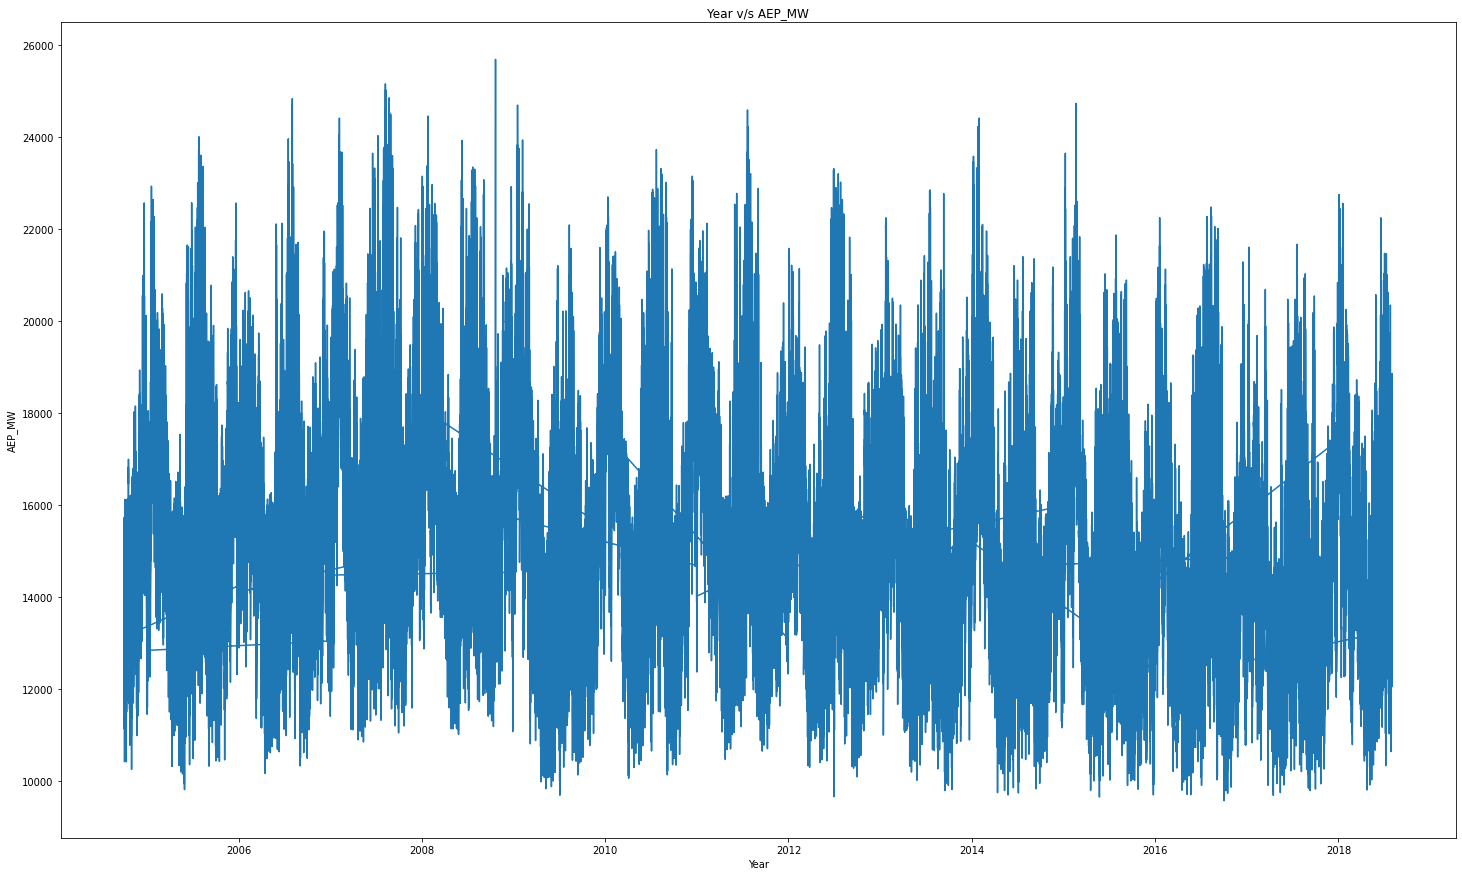

In [97]:
plt.figure(figsize=(25,15))
plt.plot(df.index,df['AEP_MW'])
plt.xlabel('Year')
plt.ylabel('AEP_MW')
plt.title('Year v/s AEP_MW')
plt.show()

## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [98]:
train_data = df1.iloc[df1.index < "01-01-2016"]
test_data = df1.iloc[df1.index >= "01-01-2016"]

plot the train and test data

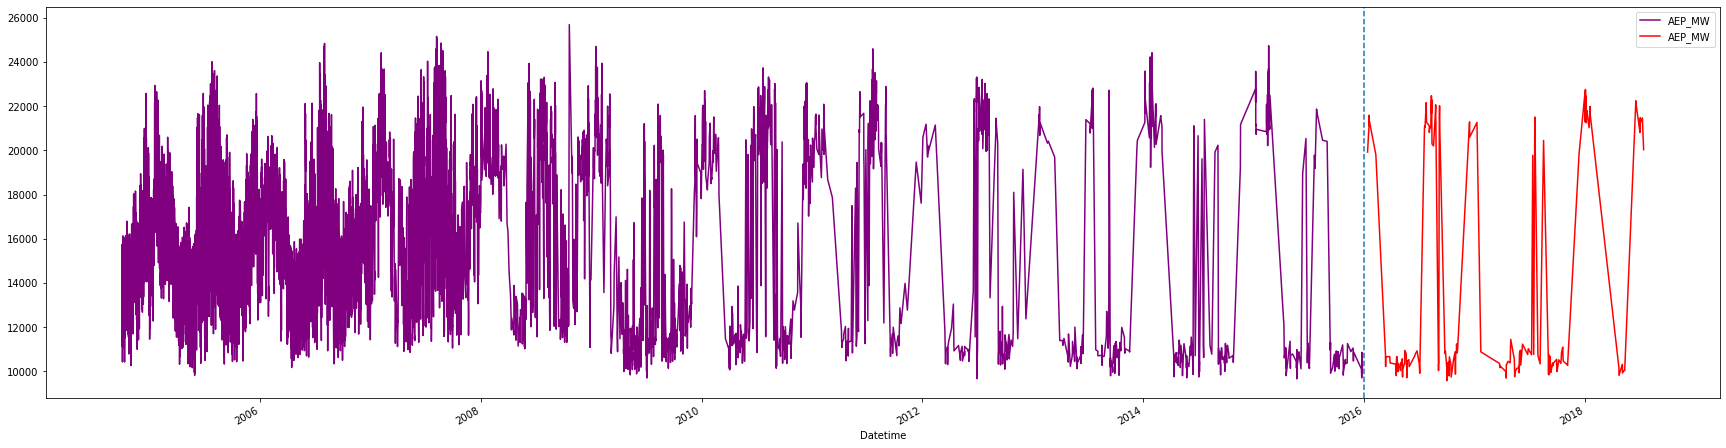

In [99]:
fig,ax = plt.subplots(figsize=(30,8))
train_data.plot(ax=ax,color='purple',label='train_data')
test_data.plot(ax=ax,color='red',label='test_data')
ax.axvline("01-01-2016",ls='--')

Plot data for a random week AND day, to visualize weekly and daily variations in data

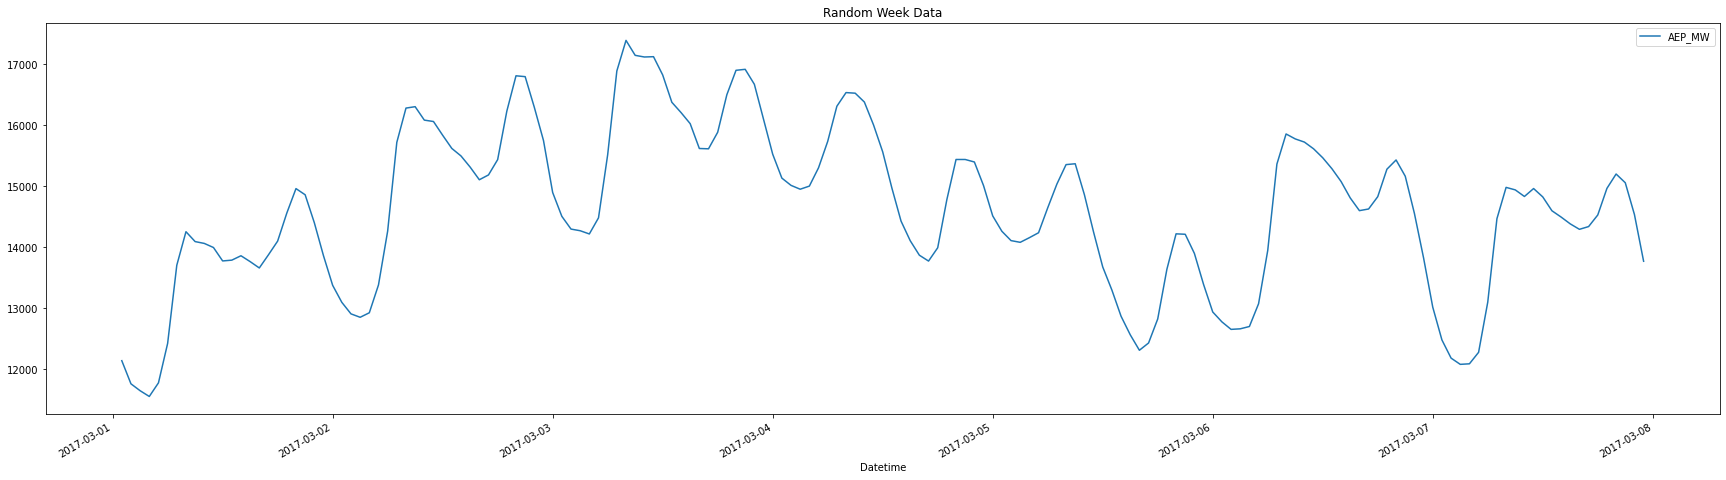

In [100]:
df.iloc[(df.index>"03-01-2017")&(df.index<"03-08-2017")].plot(figsize=(30,8),title="Random Week Data")

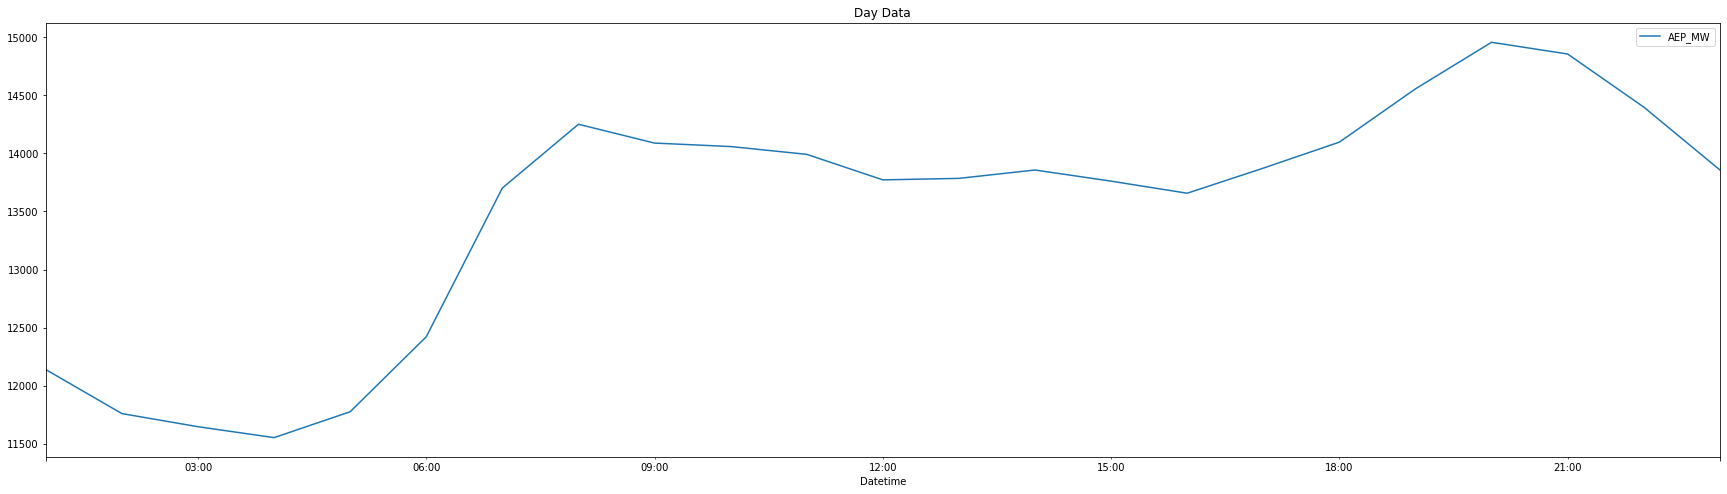

In [101]:
df.iloc[(df.index>"03-01-2017")&(df.index<"03-02-2017")].plot(figsize=(30,8),title="Day Data")

## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [102]:
def time_features(df2):
    df2 = df2.copy()
    df2["year"] = df2.index.year
    df2["month"] = df2.index.month
    df2["dayofyear"] = df2.index.dayofyear
    df2["week"] = df2.index.week
    df2["hour"] = df2.index.hour    
    return df2
df=time_features(df)

<ipython-input-102-7960180e94f2>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df2["week"] = df2.index.week


In [103]:
df

,AEP_MW,year,month,dayofyear,week,hour
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,2004,12,366,53,1
2004-12-31 02:00:00,12865.0,2004,12,366,53,2
2004-12-31 03:00:00,12577.0,2004,12,366,53,3
2004-12-31 04:00:00,12517.0,2004,12,366,53,4
2004-12-31 05:00:00,12670.0,2004,12,366,53,5
...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,2018,1,1,1,20
2018-01-01 21:00:00,20999.0,2018,1,1,1,21
2018-01-01 22:00:00,20820.0,2018,1,1,1,22


Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

Text(0.5, 1.0, 'Hourly usage')

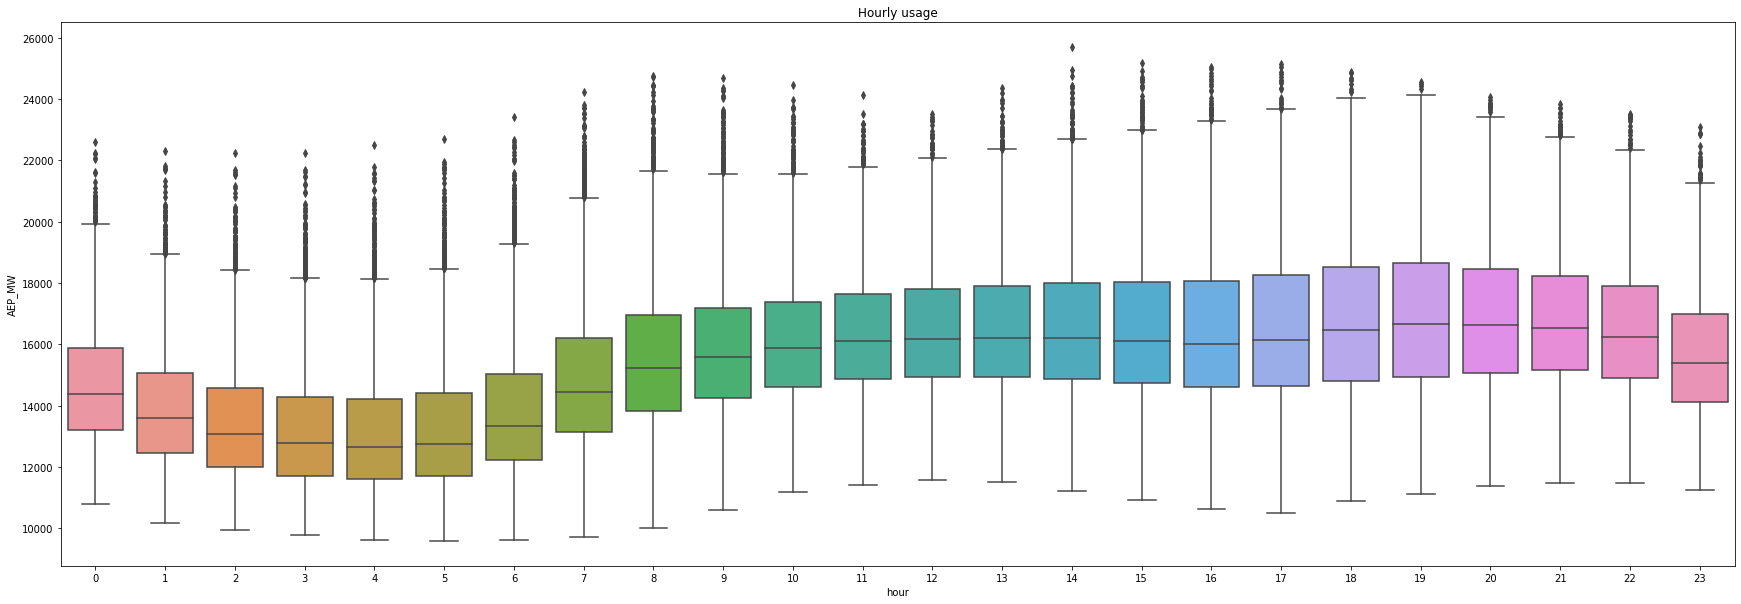

In [104]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df,x="hour",y="AEP_MW")
plt.title("Hourly usage")

Text(0.5, 1.0, 'Monthly usage')

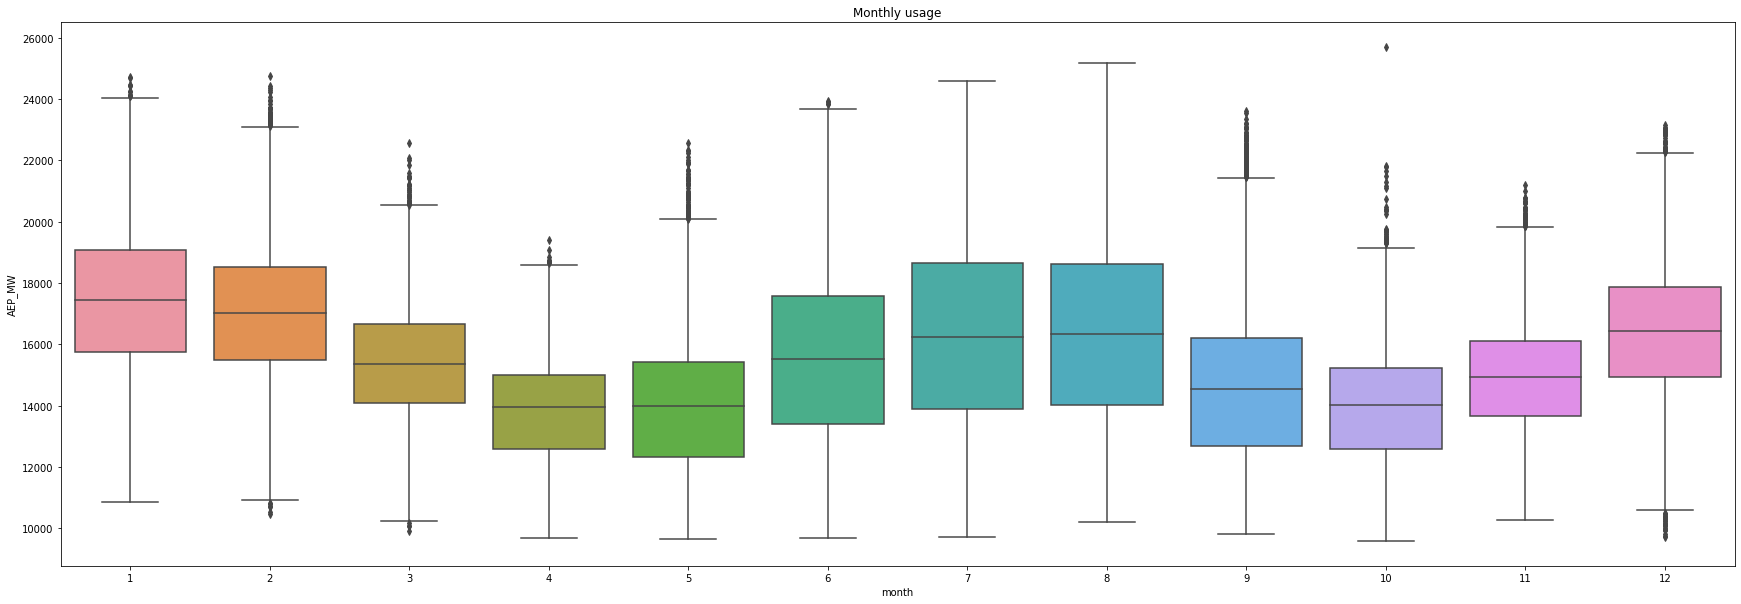

In [105]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df,x="month",y="AEP_MW")
plt.title("Monthly usage")

## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01 

In [106]:
train_data=time_features(train_data)
test_data=time_features(test_data)

<ipython-input-102-7960180e94f2>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df2["week"] = df2.index.week


In [107]:
train_x=train_data.drop(['AEP_MW'],axis=1)
train_y=train_data['AEP_MW']
test_x=test_data.drop(['AEP_MW'],axis=1)
test_y=test_data['AEP_MW']

In [108]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
regressor.fit(train_x, train_y)

[04:01:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Predict values for the testing set using the model and plot them

In [109]:
y_pred = regressor.predict(test_x)

Use RMSE to find out the accuracy of your model

In [110]:
RMSE=metrics.r2_score(test_y, y_pred)
print(RMSE)

0.9365968725630176


Find the importance of each feature use

In [111]:
df.head()

,AEP_MW,year,month,dayofyear,week,hour
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,2004,12,366,53,1
2004-12-31 02:00:00,12865.0,2004,12,366,53,2
2004-12-31 03:00:00,12577.0,2004,12,366,53,3
2004-12-31 04:00:00,12517.0,2004,12,366,53,4
2004-12-31 05:00:00,12670.0,2004,12,366,53,5


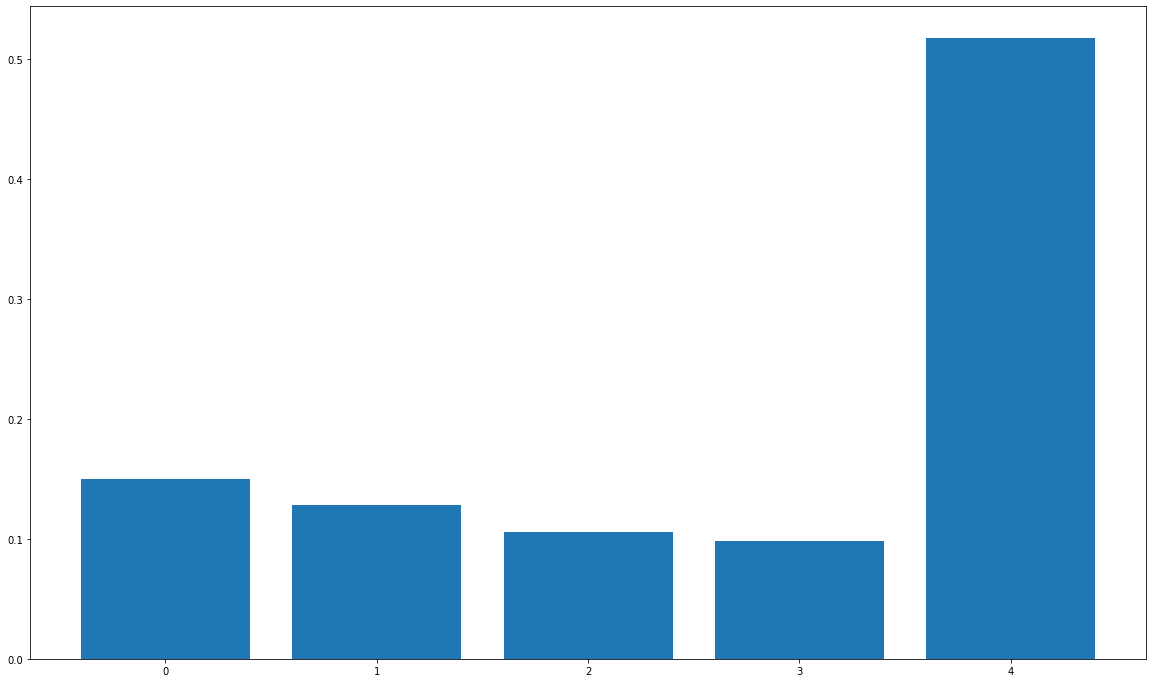

In [112]:
plt.figure(figsize=(20,12))
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_)
plt.show()